###  Study of Autoencoder.
1. Implementation of Vanilla autoencoder
2. Implementation of Deep autoencoder
3. Implementation of Convolutional autoencoder



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense

In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


### Vanilla autoencoder

In [5]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2781 - val_loss: 0.1912
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1708 - val_loss: 0.1526
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1433 - val_loss: 0.1327
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1275 - val_loss: 0.1201
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1171 - val_loss: 0.1117
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1100 - val_loss: 0.1058
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1048 - val_loss: 0.1015
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1012 - val_loss: 0.0985
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0987 - val_loss: 0.0965
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0969 - val_loss: 0.0950

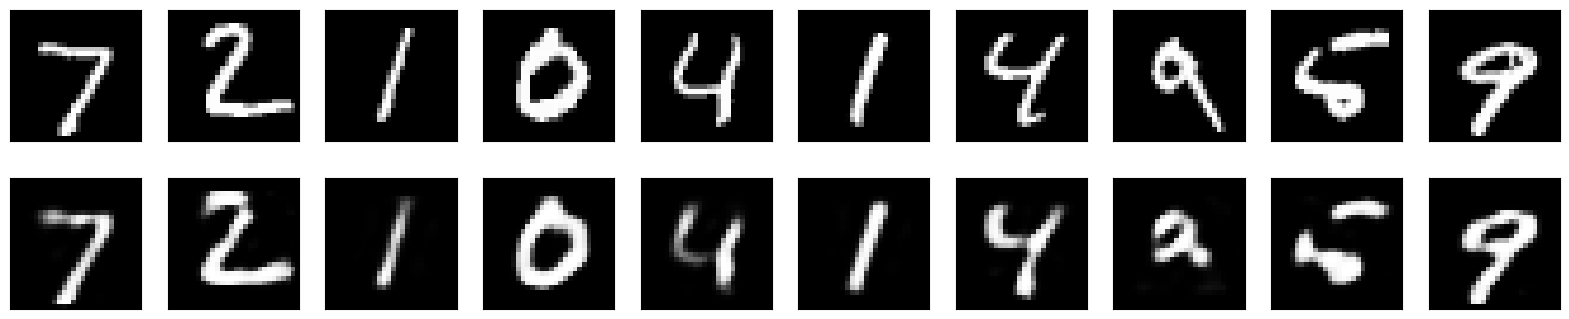

In [6]:
# Display the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.3095 - val_loss: 0.2259
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1999 - val_loss: 0.1802
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1710 - val_loss: 0.1611
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1567 - val_loss: 0.1507
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1491 - val_loss: 0.1451
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1447 - val_loss: 0.1417
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1418 - val_loss: 0.1395
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1396 - val_loss: 0.1372
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1377 - val_loss: 0.1355
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1360 - val_loss: 0.1339

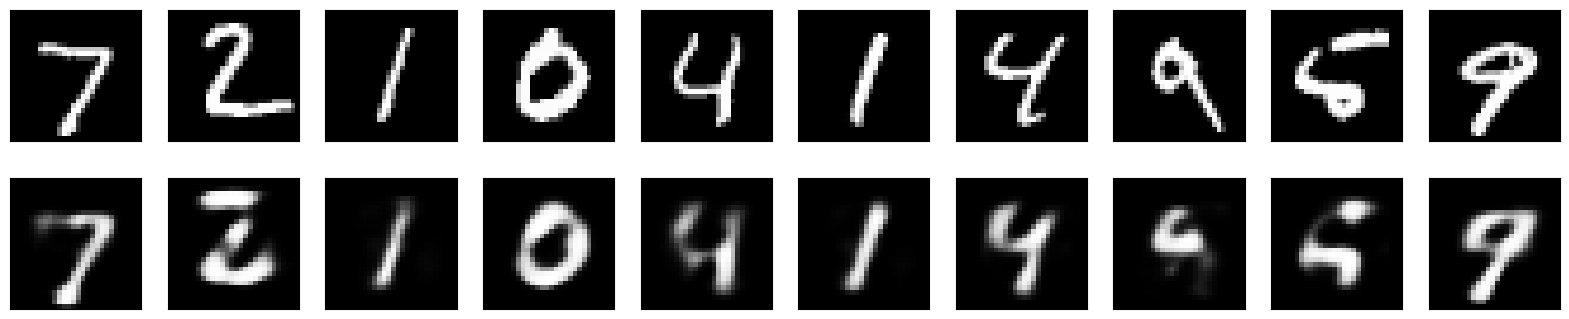

In [7]:
# For 16
input_img = Input(shape=(784,))
encoded = Dense(16, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Deep autoEncoder

Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2458 - val_loss: 0.1676
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1515 - val_loss: 0.1379
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1339 - val_loss: 0.1268
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1244 - val_loss: 0.1194
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1186 - val_loss: 0.1149
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1142 - val_loss: 0.1107
Epoch 7/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1108 - val_loss: 0.1084
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1083 - val_loss: 0.1058
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1058 - val_loss: 0.1032
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1037 - val_lo

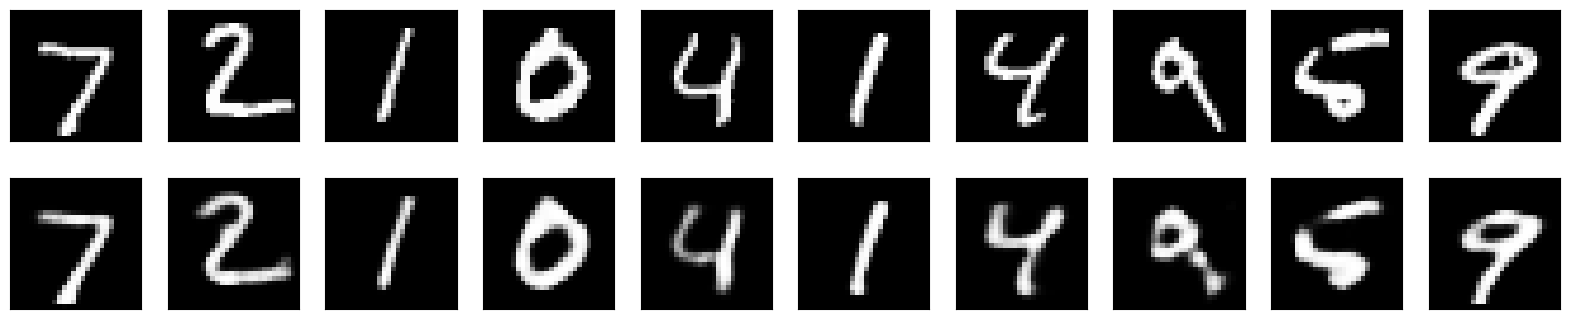

In [9]:
# Define the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


### Convolutional Autoencoder

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 [==============================] - 16s 9ms/step - loss: 0.1093 - val_loss: 0.0734
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0719 - val_loss: 0.0695
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0693 - val_loss: 0.0679
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0679 - val_loss: 0.0669
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0670 - val_loss: 0.0661
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0663 - val_loss: 0.0656
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0654 - val_loss: 0.0651
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0651 - val_loss: 0.0645
Epoch 10/50
469/469 [=============

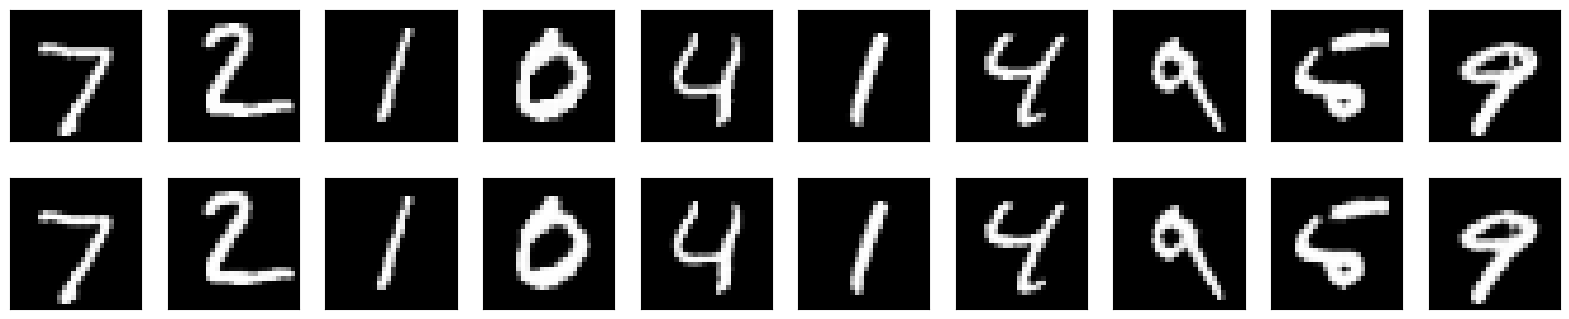

In [3]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to (batch_size, height, width, channels)
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))


# Define the input layer
input_img = Input(shape=(28, 28, 1))  # Assuming you have grayscale images of size 28x28

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode the test data
decoded_imgs = autoencoder.predict(x_test)

# Plot some examples of original and reconstructed images
n = 10  # Number of examples to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
